In [408]:
#Análise de dados públicos - Comparação de candidaturas para prefeito e vereador canceladas entre 2016 e 2020 no Brasil.

#Importando bibliotecas que serão usadas
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline
low_memory = False
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

#Base de dados
base2020 = r'C:\Users\PEDRO-PC\OneDrive\Área de Trabalho\FTC\motivo_cassacao_2020_BRASIL.csv'
base2016 = r'C:\Users\PEDRO-PC\OneDrive\Área de Trabalho\FTC\motivo_cassacao_2016_BRASIL.csv'

#Lendo a base
dados_cas2020 = pd.read_csv(base2020, sep = ";", encoding='iso-8859-1', usecols=['NM_UE', 'DS_MOTIVO_CASSACAO', 'SG_UF'])
dados_cas2016 = pd.read_csv(base2016, sep = ";", encoding='iso-8859-1', usecols=['NM_UE', 'DS_MOTIVO_CASSACAO', 'SG_UF'])

#Renomeando colunas para melhor visualização
dados_cas2020.rename(columns={'NM_UE': 'CIDADE', 'SG_UF': 'ESTADO', 'DS_MOTIVO_CASSACAO': 'MOTIVO_CASSACAO'},inplace=True)
dados_cas2016.rename(columns={'NM_UE': 'CIDADE', 'SG_UF': 'ESTADO', 'DS_MOTIVO_CASSACAO': 'MOTIVO_CASSACAO'},inplace=True)

#Tipo de informação que os arquivos csv fornecem
dados_cas2020.info()
dados_cas2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20584 entries, 0 to 20583
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ESTADO           20584 non-null  object
 1   CIDADE           20584 non-null  object
 2   MOTIVO_CASSACAO  20584 non-null  object
dtypes: object(3)
memory usage: 241.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19154 entries, 0 to 19153
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ESTADO           19154 non-null  object
 1   CIDADE           19154 non-null  object
 2   MOTIVO_CASSACAO  19154 non-null  object
dtypes: object(3)
memory usage: 224.5+ KB


Text(0.5, 1.0, 'Comparação de candidaturas canceladas nos estados brasileiros em 2016 e 2020.')

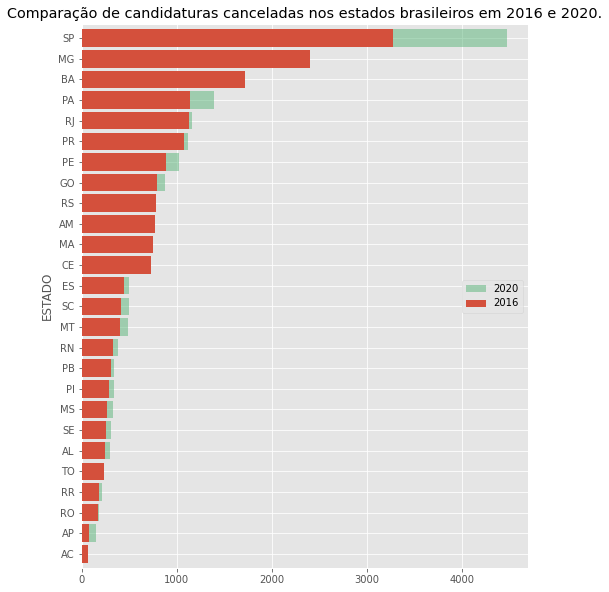

In [409]:
#Gráfico de estados com maior número de candidaturas canceladas nos anos de 2020 e 2016.
ranking2020 = dados_cas2020.groupby("ESTADO")["MOTIVO_CASSACAO"].size().sort_values(ascending=False)
ranking2016 = dados_cas2016.groupby("ESTADO")["MOTIVO_CASSACAO"].size().sort_values(ascending=False)
dados_cas2020.groupby('ESTADO')["MOTIVO_CASSACAO"].size().sort_values().tail(26).plot(kind='barh', figsize=(8, 10), color='#58b478', zorder=5, width=0.85, alpha=0.5)
dados_cas2016.groupby('ESTADO')["MOTIVO_CASSACAO"].size().sort_values().tail(26).plot(kind='barh', figsize=(8, 10), color='#d4503c', zorder=5, width=0.85, alpha=1)
plt.legend(["2020", "2016"], loc='right')
plt.title("Comparação de candidaturas canceladas nos estados brasileiros em 2016 e 2020.")

In [410]:
#Informações gerais
fichalimpa2020 = dados_cas2020.query('MOTIVO_CASSACAO == "Ficha limpa (LC 64/90)"')['MOTIVO_CASSACAO'].count()
fichalimpa2016 = dados_cas2016.query('MOTIVO_CASSACAO == "Ficha limpa (LC 64/90)"')['MOTIVO_CASSACAO'].count()
abuso2016 = dados_cas2016.query('MOTIVO_CASSACAO == "Abuso de poder (LC 64/90)"')['MOTIVO_CASSACAO'].count()
abuso2020 = dados_cas2020.query('MOTIVO_CASSACAO == "Abuso de poder (LC 64/90)"')['MOTIVO_CASSACAO'].count()
outros2020 = dados_cas2020.query('MOTIVO_CASSACAO != "Ficha limpa (LC 64/90) and Abuso de Poder (LC 64/90)"')['MOTIVO_CASSACAO'].count()
outros2016 = dados_cas2016.query('MOTIVO_CASSACAO != "Ficha limpa (LC 64/90) and Abuso de Poder (LC 64/90)"')['MOTIVO_CASSACAO'].count()

print(str(fichalimpa2016) + " Candidatos com candidatura cancelada por causa da Lei da Ficha Limpa, em 2016")
print(str(fichalimpa2020) + " Candidatos com candidatura cancelada por causa da Lei da Ficha Limpa, em 2020" + '\n')
print(str(abuso2016) + " Candidatos com candidatura cancelada por causa de Abuso de Poder, em 2016")
print(str(abuso2020) + " Candidatos com candidatura cancelada por causa de Abuso de Poder, em 2020" + '\n')
print(str(outros2016) + " Candidatos com candidatura cancelada por outros motivos, em 2016")
print(str(outros2020) + " Candidatos com candidatura cancelada por outros motivos, em 2020")



2124 Candidatos com candidatura cancelada por causa da Lei da Ficha Limpa, em 2016
2399 Candidatos com candidatura cancelada por causa da Lei da Ficha Limpa, em 2020

131 Candidatos com candidatura cancelada por causa de Abuso de Poder, em 2016
78 Candidatos com candidatura cancelada por causa de Abuso de Poder, em 2020

19154 Candidatos com candidatura cancelada por outros motivos, em 2016
20584 Candidatos com candidatura cancelada por outros motivos, em 2020


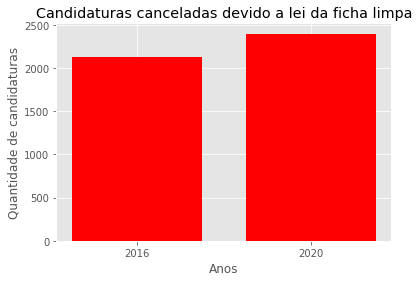

In [411]:
#Criação do gráfico sobre candidaturas canceladas devido a lei da ficha limpa.
plt.style.use('ggplot')
x = ['2016', '2020']
anos = [fichalimpa2016, fichalimpa2020]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, anos, width=0.75, color='red')
plt.xlabel("Anos")
plt.ylabel("Quantidade de candidaturas")
plt.title("Candidaturas canceladas devido a lei da ficha limpa")
plt.xticks(x_pos, x)
plt.show()

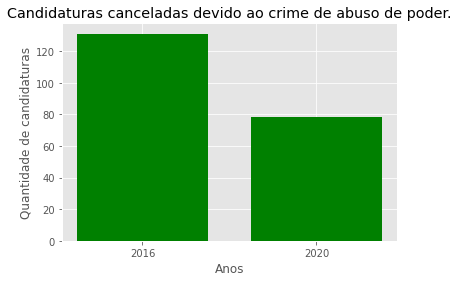

In [412]:
#Criação do gráfico das candidaturas canceladas devido ao crime de abuso de poder.
plt.style.use('ggplot')
x1 = ['2016', '2020']
anos1 = [abuso2016, abuso2020]
x1_pos = [z for z, _ in enumerate(x1)]
plt.bar(x1_pos, anos1, width=0.75, color='green')
plt.xlabel("Anos")
plt.ylabel("Quantidade de candidaturas")
plt.title("Candidaturas canceladas devido ao crime de abuso de poder.")
plt.xticks(x1_pos, x1)
plt.show()

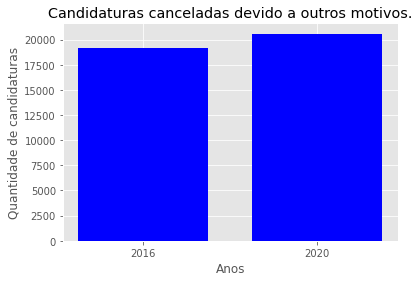

In [413]:
#Criação do gráfico de candidaturas canceladas por outros motivos.
plt.style.use('ggplot')
x2 = ['2016', '2020']
anos2 = [outros2016, outros2020]
x2_pos = [y for y, _ in enumerate(x2)]
plt.bar(x2_pos, anos2, width=0.75, color='blue')
plt.xlabel("Anos")
plt.ylabel("Quantidade de candidaturas")
plt.title("Candidaturas canceladas devido a outros motivos.")
plt.xticks(x2_pos, x2)
plt.show()

In [414]:
#Resultados finais#

#O número de candidaturas canceladas aos cargos de prefeito e vereador aumentaram devido a Lei da Ficha Limpa.
#Enquanto isso, o número de candidaturas canceladas por causa de abuso de poder diminuíram consideravelmente.
#O número de candidaturas canceladas por outros motivos aumentou ligeiramente.
